# Enhancing Financial Safety through Credit Card Fraud Detection

This project will focus on Credit Card Fraud detection using Machine Learning and the dataset is taken from [Kaggle](https://www.kaggle.com/datasets/kartik2112/fraud-detection).This project would focus on algortihms such as Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate. This notebook would focus on describing step by step and might also focus on potential alternatives and drawbacks.

## Setting up the environment 

Downloading raw dataset from kaggle and importing necessary libraries

In [1]:
#import opendatasets as od
import pandas as pd

#od.download("https://www.kaggle.com/datasets/kartik2112/fraud-detection")

In [2]:
testfile=pd.read_csv(r'fraud-detection\fraudTest.csv')
trainfile=pd.read_csv(r'fraud-detection\fraudTrain.csv')

The above two cells focused on setting up the data and analysing the data, Since the given dataset is already divided into training and testing, we can assume that Data Cleaning has been completed. We would srtill focus on Exploration of data and feature engineering to get our unique model. We would also focus solely on training data from now-onwards.

In [37]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import category_encoders as ce
import datetime as dt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree as Dtree

from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

## Cleaning of data

Looking for null values, description of each column or possibly removing of duplicated or corrupted data

In [4]:
# Exploring the training dataset
trainfile.info()
pd.set_option('display.max_columns', None)
trainfile.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
#Finding any null values 
trainfile.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
trainfile.shape

(1296675, 23)

## EDA

Exploratory Data analysis to setup the stage for feature engineering

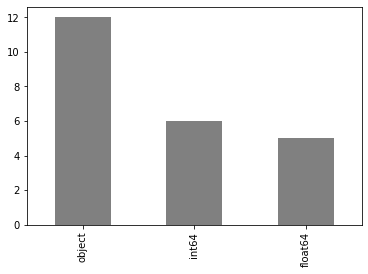

In [7]:
trainfile.dtypes.value_counts().plot(kind='bar', color="grey");

In [8]:
# Finding the number of fraudulent transactions marked. As given 
#0 is legit transactiona 
#1 is fraudulent transaction

trainfile['is_fraud'].value_counts(normalize=True)*100

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64

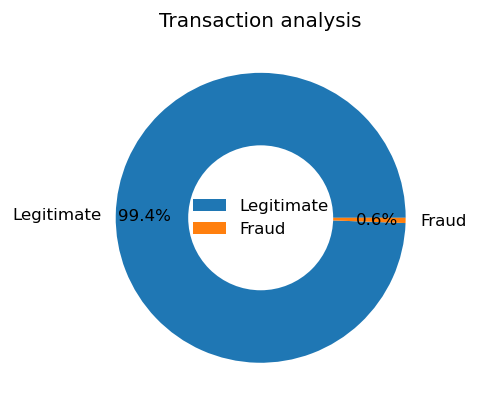

In [9]:
donut = trainfile['is_fraud'].value_counts()
mlabels = ["Legitimate","Fraud"]
fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut,labels=mlabels,autopct="%1.1f%%",pctdistance=0.8,explode=(0,0))
centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Transaction analysis")
plt.legend(labels=mlabels, loc="center", frameon=False)
plt.show();

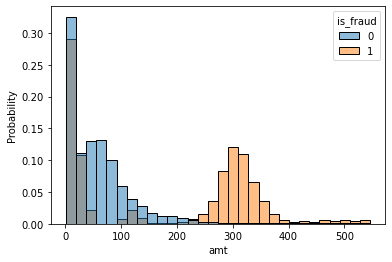

In [10]:
p99 = trainfile["amt"].quantile(0.99)
sns.histplot(x="amt", hue="is_fraud", bins=30,
             stat="probability", data=trainfile[trainfile["amt"] <= p99],
             common_norm=False);

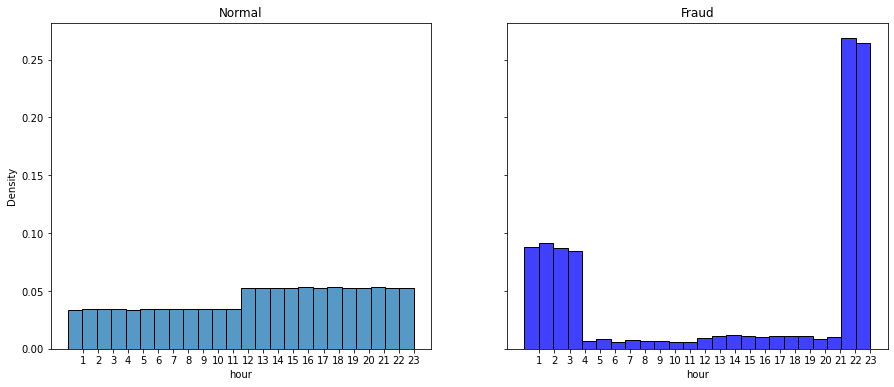

In [11]:
trainfile['hour'] = pd.to_datetime(trainfile['trans_date_trans_time']).dt.hour
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='hour', data=trainfile[trainfile["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1)
ax2 = sns.histplot(x='hour', data=trainfile[trainfile["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 24))
ax2.set_xticks(np.arange(1, 24));

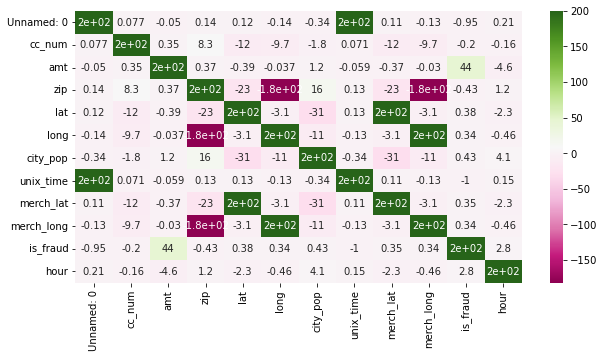

In [12]:
plt.figure(figsize=(10,5))
hm = sns.heatmap(data=trainfile.corr()*200,cmap="PiYG",annot=True)
plt.show()

In [13]:
#This is an unbalanced dataset, so we have to balance it so that we can correctly mark it as correct or wrong
# Seperating data for analysis


legittrainfile = trainfile[trainfile.is_fraud == 0]
fraudtrainfile = trainfile[trainfile.is_fraud == 1]

## Feature engineering

Removing non-useful columns as well following catergorical coding

In [14]:
trainfile.drop(columns=["merchant", "first", "last", "street",
           "unix_time", "trans_num","Unnamed: 0"], inplace=True)

In [15]:
testfile.drop(columns=["merchant", "first", "last", "street",
           "unix_time", "trans_num","Unnamed: 0"], inplace=True)

In [16]:
def apply_woe(trainfile, columns, target_col):
    woe = ce.WOEEncoder()

    for col in columns:
        X = trainfile[col]
        y = trainfile[target_col]

        new_col_name = f"{col}_WOE"
        trainfile[new_col_name] = woe.fit_transform(X, y)

    return trainfile


columns_to_encode = ["category", "state", "city", "job"]
target_column = "is_fraud"

trainfile = apply_woe(trainfile, columns_to_encode, target_column)
testfile = apply_woe(testfile, columns_to_encode,target_column)

gender_mapping = {"F": 0, "M": 1}

trainfile["gender_binary"] = trainfile["gender"].map(gender_mapping)
testfile["gender_binary"] = testfile["gender"].map(gender_mapping)

In [17]:
trainfile.drop(columns=["job","city","gender","state","category","hour"], inplace=True)
testfile.drop(columns=["job","city","gender","state","category"], inplace=True)



trainfile['lat_dist'] = abs(round(trainfile['merch_lat']-trainfile['lat'],2))
trainfile['long_dist'] = abs(round(trainfile['merch_long']-trainfile['long'],2))

trainfile['lat_dist'] = abs(round(trainfile['merch_lat']-trainfile['lat'],2))
trainfile['long_dist'] = abs(round(trainfile['merch_long']-trainfile['long'],2))



testfile['lat_dist'] = abs(round(testfile['merch_lat']-testfile['lat'],2))
testfile['long_dist'] = abs(round(testfile['merch_long']-testfile['long'],2))

testfile['lat_dist'] = abs(round(trainfile['merch_lat']-testfile['lat'],2))
testfile['long_dist'] = abs(round(testfile['merch_long']-testfile['long'],2))



trainfile['age'] = dt.date.today().year-pd.to_datetime(trainfile['dob']).dt.year
trainfile['hour'] = pd.to_datetime(trainfile['trans_date_trans_time']).dt.hour
trainfile['month'] = pd.to_datetime(trainfile['trans_date_trans_time']).dt.month

testfile['age'] = dt.date.today().year-pd.to_datetime(testfile['dob']).dt.year
testfile['hour'] = pd.to_datetime(testfile['trans_date_trans_time']).dt.hour
testfile['month'] = pd.to_datetime(testfile['trans_date_trans_time']).dt.month


trainfile.drop(columns=["dob","trans_date_trans_time"], inplace=True)
testfile.drop(columns=["dob","trans_date_trans_time"], inplace=True)

In [18]:
trainfile.info()
trainfile.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1296675 non-null  int64  
 1   amt            1296675 non-null  float64
 2   zip            1296675 non-null  int64  
 3   lat            1296675 non-null  float64
 4   long           1296675 non-null  float64
 5   city_pop       1296675 non-null  int64  
 6   merch_lat      1296675 non-null  float64
 7   merch_long     1296675 non-null  float64
 8   is_fraud       1296675 non-null  int64  
 9   category_WOE   1296675 non-null  float64
 10  state_WOE      1296675 non-null  float64
 11  city_WOE       1296675 non-null  float64
 12  job_WOE        1296675 non-null  float64
 13  gender_binary  1296675 non-null  int64  
 14  lat_dist       1296675 non-null  float64
 15  long_dist      1296675 non-null  float64
 16  age            1296675 non-null  int64  
 17  hour    

(1296675, 19)

In [19]:
testfile.info()
testfile.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cc_num         555719 non-null  int64  
 1   amt            555719 non-null  float64
 2   zip            555719 non-null  int64  
 3   lat            555719 non-null  float64
 4   long           555719 non-null  float64
 5   city_pop       555719 non-null  int64  
 6   merch_lat      555719 non-null  float64
 7   merch_long     555719 non-null  float64
 8   is_fraud       555719 non-null  int64  
 9   category_WOE   555719 non-null  float64
 10  state_WOE      555719 non-null  float64
 11  city_WOE       555719 non-null  float64
 12  job_WOE        555719 non-null  float64
 13  gender_binary  555719 non-null  int64  
 14  lat_dist       555719 non-null  float64
 15  long_dist      555719 non-null  float64
 16  age            555719 non-null  int64  
 17  hour           555719 non-nul

(555719, 19)

# Undersampling

In [20]:
X = trainfile.drop(columns=["is_fraud"])
y = trainfile["is_fraud"]

rus = RandomUnderSampler(sampling_strategy=0.18, random_state=42)

In [24]:
X_undersampled, y_undersampled = rus.fit_resample(X, y)

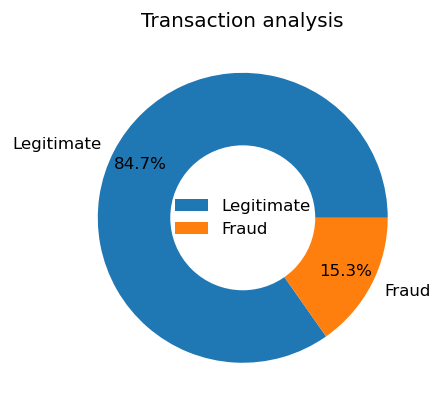

In [27]:
donut = y_undersampled.value_counts()
mlabels = ["Legitimate","Fraud"]
fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut,labels=mlabels,autopct="%1.1f%%",pctdistance=0.8,explode=(0,0))
centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Transaction analysis")
plt.legend(labels=mlabels, loc="center", frameon=False)
plt.show();

## Modelling

In [28]:
X_train = X_undersampled
X_test = testfile.drop('is_fraud',axis=1)
y_train = y_undersampled
y_test = testfile['is_fraud']

### Random Forest

In [29]:
rf_params ={"max_depth": [1,2],
            "max_features":["sqrt"],
            "n_estimators":[200],
            "min_samples_split":[2,5,7]}
rf_model=RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=2)
rf_cv_model.fit(X_train,y_train)
print("Best Parameter:"+str(rf_cv_model.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameter:{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


In [32]:
rf_tuned=RandomForestClassifier(max_depth=2,
                                max_features='sqrt',
                                min_samples_split=5,
                                n_estimators=200)
rf_tuned.fit(X_train,y_train)
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9972288152825439

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.9972
Precision : 0.9994
Recall or Sensitivity : 0.9978
True Positive Rate : 0.9978
False Positive Rate : 0.2650


In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_tuned, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.90571022 0.90225564 0.90753912 0.90367811 0.89026621 0.91546434
 0.86829268 0.90101626 0.90792683 0.90752033]
Average cross-validation score: 0.9010


In [35]:
accuracy_score(y_test,y_pred)

0.9972288152825439

## Logistic Regression

In [50]:
lgreg = LogisticRegression(solver='saga',random_state=42,max_iter=10000)
lgreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42, solver='saga')

In [51]:
y_pred=lgreg.predict(X_test)
accuracy_score(y_test,y_pred)

0.9961401355721147

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lgreg, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.84738874 0.84738874 0.84738874 0.84738874 0.84738874 0.84738874
 0.84756098 0.84756098 0.84756098 0.84756098]
Average cross-validation score: 0.8475


## Decision tree

In [55]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9707082176423696

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.97785003 0.97581792 0.97845966 0.97500508 0.97175371 0.97602113
 0.8847561  0.98109756 0.97845528 0.98069106]
Average cross-validation score: 0.9680
